In [4]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from numpy import ndarray
%matplotlib inline

Задача.

В задаче требуется экспериментально проверить утверждение, что для любой несмещенной оценки $\hat{\theta}(X)$ параметра $\theta$ выполнено неравенство Рао-Крамера $D_\theta\hat{\theta}(X) \geq \frac{1}{I_X(\theta)}$.

Cгенерируем выборку $X_1, ..., X_N$ , $N = 1000$, из распределений в теоретических задачах (Биномиальное, экспоненциальное распределение и нормальное распределение с неизвестным математическим ожиданием).

В случае биномиального распределения m = 50, в случае нормального распределения с неизвестным математическим ожиданием $\sigma^2 = 2.1$. Второй параметр (единственный в случае экспоненциального распределения) выберем случайно из распределения, предложенного в файле($Beta(4,4)$).

Для всех $n \leq N$ посчитаем значение эффективной оценки и бутстрепную оценку дисперсии для эффективной оценки (параметрический бутстреп, количество бутстрепных выборок равно $K = 500$). Эффективные оценки, из дз: $Bin(m,p): \hat{p} = \frac{\bar{X}}{m}$, $ I_X(p) = \frac{nm}{p(1-p)}$,
$Exp(\theta): \hat{\frac{1}{\theta}} = \bar{X}$,$I_X(\theta) = \frac{n}{\theta^2}$ , $Norm(a,\sigma^2): \hat{a} = \bar{X}, I_X(a) = \frac{n}{2\sigma^4}$

Затем, сделаем то же самое с другой несмещенной оценкой — в задаче 3 возьмем $\frac{X_1}{m}$, в задаче 4 возьмем(не возьмем, так как она оказалась смещенной) $ (n-1)/(X_1+\ldots+X_n)$, в задаче 5 возьмем выборочную медиану.

Построим графики зависимости бутстрепных оценок дисперсий от размера выборки $n$. Для каждой бутстрепной оценки построим на том же графике кривую зависимости $\frac{1}{I_X(\theta)}$ от n.

In [41]:
# Функция выполняющая задачу для одного распределения.
def solve_task(theta, destribution, Fisher_lim, evaluation, N=1000, K=500, ylim=0):
    # Оцениваем дисперсию для последнего параметра выдаваемого evaluation.
    # Количество параметров распределения.
    theta_len = len(theta)
    # Создание выборки.
    sample = destribution(N, theta)
    # Цикл, просто запускает, поданные в параметрах, функции от среза массива sample[:n].
    # Получаем лист оценок параметров.
    # Возвращает 2 параметра.
    estimations_array = np.array(list(map(lambda n: evaluation(sample[:n]), range(1, N))))
    # Массив выборочных дисперсий.
    # Делаем параметрический бутстреп с K выборками.
    sample_var_array = [np.var([evaluation(destribution(n, estimations_array[n - 1]))[theta_len - 1]
                                         for i in range(K)]) for n in range(1, N)]
    # Построим графики зависимости бутстрепных оценок дисперсии от размера выборки.
    # Построим на том же графике кривую зависимости 1/I_X от n.
    n = range(N - 1)
    plt.figure(figsize=(10, 7))
    plt.xlabel("n")
    plt.plot(n, sample_var_array, color='b', label=r"Parametric bootstrap dispersion")
    plt.plot(n, [Fisher_lim(i, theta) for i in range(1, N)], color='g', label=r"$\frac{1}{I_X(\theta)}$")
    plt.title(r'Bootstrap dispersion', fontsize=10)
    if ylim != 0:
        pylab.ylim(0, ylim)
    plt.legend(fontsize=15,loc=2)
    plt.show()
    print("On the last step:")
    print("sample variance: ", sample_var_array[-1])
    print("Rao Kramer limit: ", Fisher_lim(N, theta))
    

### Биномиальное распределение.

In [36]:
# Случайно выберем второй параметр из Beta(4,4).
p = stats.beta.rvs(a=4.,b=4.,size=1)[0]
print(p)

0.513708676833


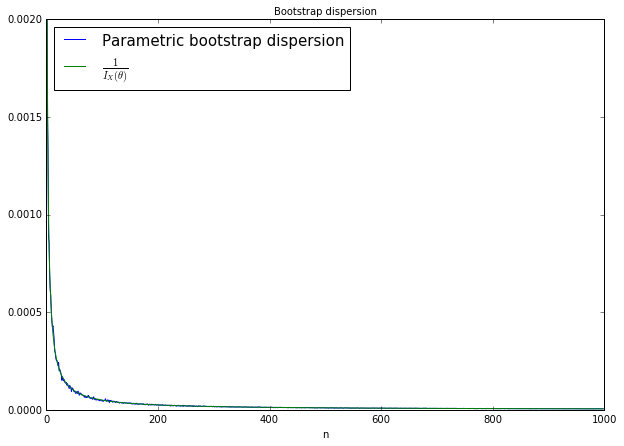

On the last step:
sample variance:  5.15513510548e-06
Rao Kramer limit:  4.99624144359e-06


In [47]:
# m = 50
solve_task(theta=[50., p], destribution = (lambda N, theta: stats.binom.rvs(n=theta[0], p=theta[1], 
            size=N)), evaluation = (lambda x: (50., np.average(x) / 50.)), 
            Fisher_lim =(lambda i, tht: tht[1] * (1 - tht[1]) / (50.*i)), ylim = 0.002)

Теперь просто несмещенная оценка для биномиального.

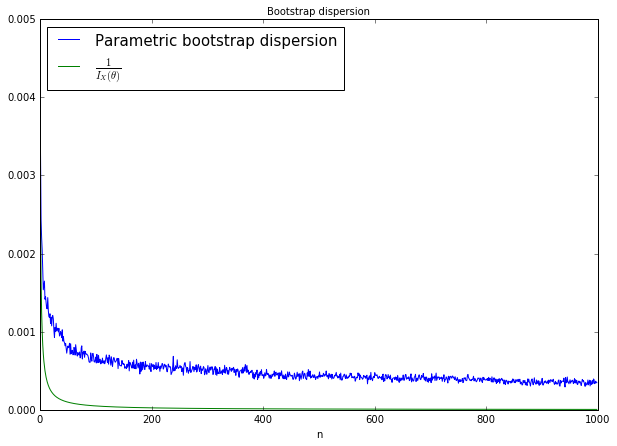

On the last step:
sample variance:  0.0003465344
Rao Kramer limit:  4.99624144359e-06


In [48]:
# m = 50
solve_task(theta=[50., p], destribution = (lambda N, theta: stats.binom.rvs(n=theta[0], p=theta[1], 
            size=N)), evaluation = (lambda x: (50., np.min(x) / 50.)), 
            Fisher_lim =(lambda i, tht: tht[1] * (1 - tht[1]) / (50.*i)), ylim = 0.005)

#### Экспоненциальное

In [6]:
thet = stats.beta.rvs(a=4.,b=4.,size=1)[0]
print(thet)

0.623373041748


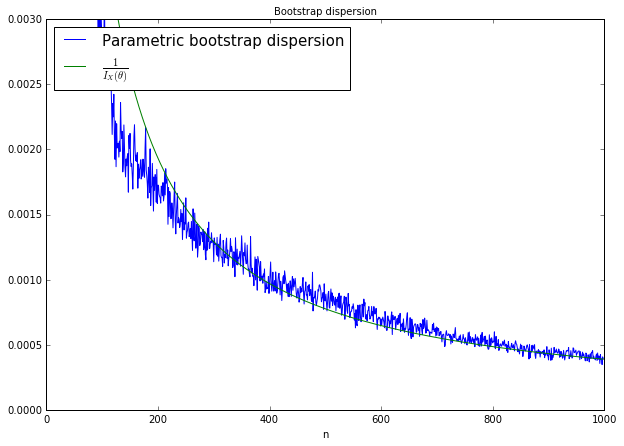

On the last step:
sample variance:  0.000391227567524
Rao Kramer limit:  0.000388593949178


In [40]:
# Эффективная оценка. scale = 1 / lambda
solve_task(theta=[thet], destribution = (lambda N, theta: stats.expon.rvs(scale=1. / theta[0], size=N)),
             evaluation = (lambda x: [np.average(x)]), Fisher_lim = (lambda i, tht: tht[0] ** 2 / i), ylim = 0.003)

Для несмещенной оценки не делаем.(Так было сказано)

Для нормального распределения.

In [17]:
a = stats.beta.rvs(a=4.,b=4.,size=1)[0]
print(a)

0.640721709121


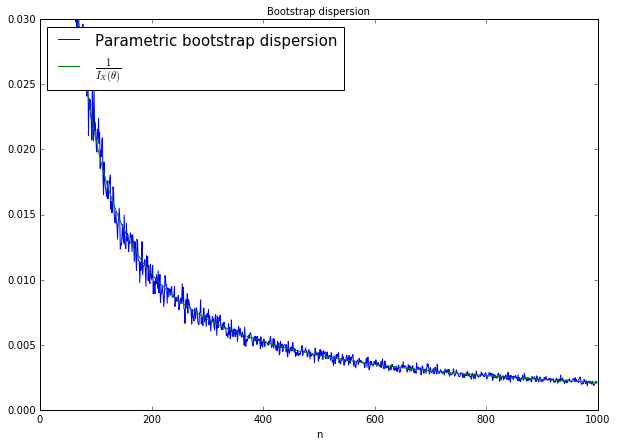

On the last step:
sample variance:  0.00203813714838
Rao Kramer limit:  0.0021000000000000003


In [39]:
# Эффективная оценка. loc = 1, scale = sigma.
solve_task(theta=[np.sqrt(2.1), a], destribution = (lambda N, theta: stats.expon.rvs(loc=theta[1], scale=theta[0], 
            size=N)), evaluation = (lambda x: (np.sqrt(2.1), np.average(x))), 
            Fisher_lim = (lambda i, tht: (2.1) / i), ylim = 0.03)

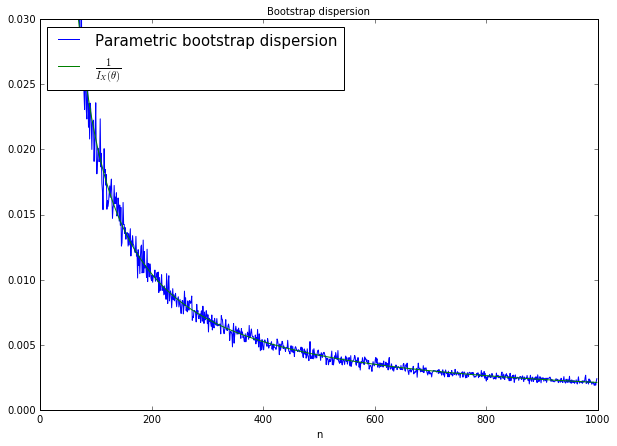

On the last step:
sample variance:  0.0023916010329
Rao Kramer limit:  0.0021000000000000003


In [38]:
# Несмещенная оценка.
solve_task(theta=[np.sqrt(2.1), a], destribution = (lambda N, theta: stats.expon.rvs(loc=theta[1], scale=theta[0], 
            size=N)), evaluation = (lambda x: (np.sqrt(2.1), np.median(x))), 
            Fisher_lim = (lambda i, tht: (2.1) / i), ylim = 0.03)

### Вывод. Мы убедились что у всех распределений эффективные теоретические оценки, действительно являются эффективными и находятся около кривой $\frac{1}{I_X(\theta)}$, что подтверждает неравенство Крамера-Рао. А просто несмещенные оценки ведут себя по разному, у биномиального она серьезно хуже, чем эффективная(график подобен графику эффективной, но поднят выше), а у нормального несмещенная оценка ведет себя почти так же как эффективная.